# K-MEANS


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
# ------------------PCA----------------------
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
# --------------------tensorflow--------------------
import tensorflow as tf
# from tensorflow.python.keras.layers import Input, Dense
# from tensorflow.python.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
# -------------------------------------------------
from tf_keras.models import Model
from tf_keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input
# -------------------------------------------------
from scipy.cluster.hierarchy import dendrogram, linkage


2025-09-15 22:47:32.238341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-15 22:47:32.302751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-15 22:47:33.965447: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
np.random.seed(42)
data = np.random.rand(100, 2)
data

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [5]:
centroides = kmeans.cluster_centers_
centroides

array([[0.77630221, 0.71893453],
       [0.30496924, 0.21311702],
       [0.12006068, 0.90489563],
       [0.7920458 , 0.22728231],
       [0.22739621, 0.59428412]])

In [6]:
etiquetas = kmeans.labels_
etiquetas

array([2, 0, 1, 2, 0, 2, 3, 1, 4, 1, 3, 1, 4, 4, 3, 3, 2, 0, 1, 3, 4, 2,
       4, 4, 1, 0, 0, 0, 1, 1, 1, 3, 4, 2, 2, 3, 2, 0, 3, 1, 0, 1, 1, 0,
       3, 4, 0, 0, 1, 1, 4, 4, 3, 4, 1, 1, 0, 0, 3, 0, 0, 1, 4, 0, 4, 1,
       1, 3, 0, 2, 3, 1, 1, 0, 1, 3, 4, 3, 0, 4, 4, 0, 2, 1, 4, 3, 1, 3,
       3, 3, 1, 0, 4, 0, 1, 2, 0, 1, 0, 0], dtype=int32)

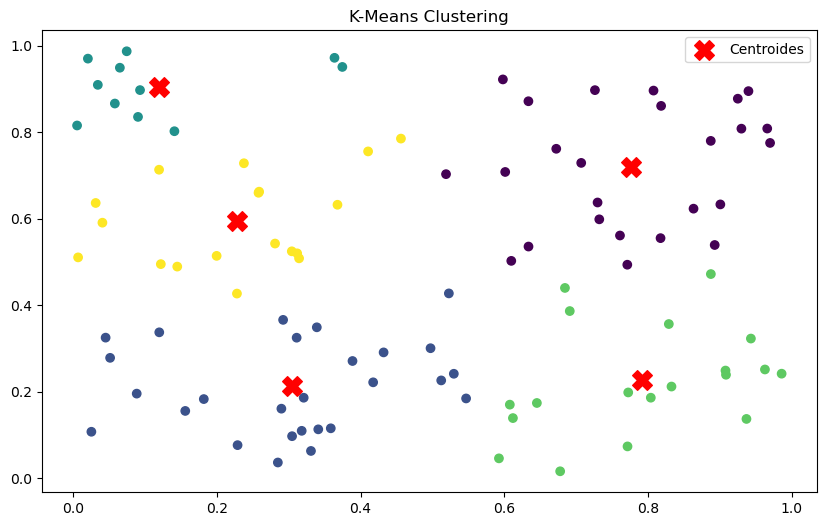

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=etiquetas, cmap='viridis', marker='o')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('K-Means Clustering')
plt.legend();

In [9]:
pinguinos = sns.load_dataset('penguins')


In [10]:
pinguinos.dropna(inplace=True)

In [11]:
data = pinguinos[['bill_length_mm', 'bill_depth_mm']]

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [13]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [14]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

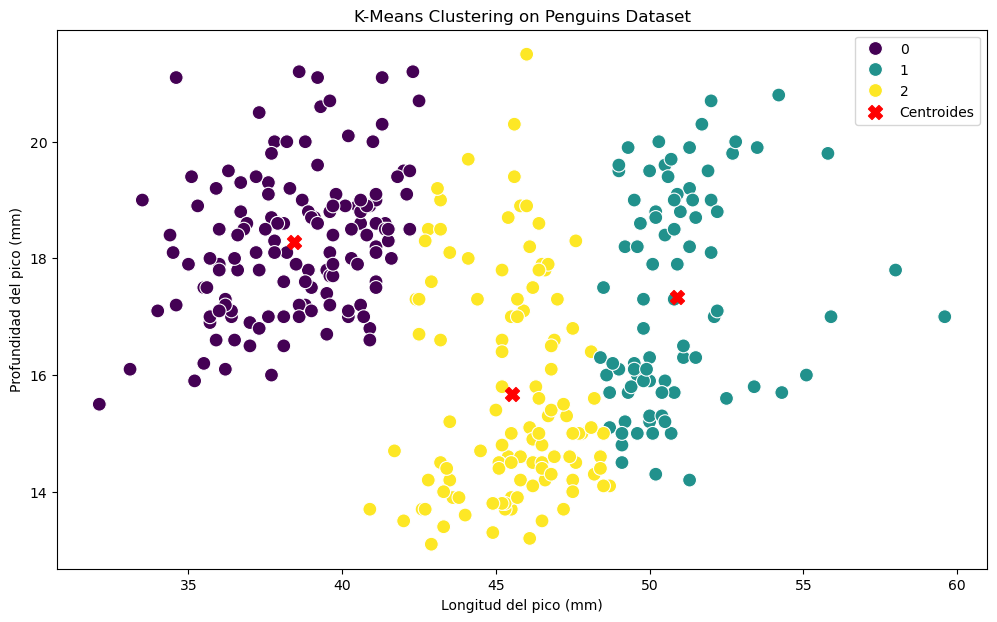

In [18]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=pinguinos,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue=etiquetas,
    palette="viridis",
    s=100,
)
plt.scatter(
    centroides[:, 0], centroides[:, 1], c="red", s=100, marker="X", label="Centroides"
)
plt.title('K-Means Clustering on Penguins Dataset')
plt.legend()
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Profundidad del pico (mm)');

# PCA Analisis de componentes principales

In [20]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
X = iris.data
y= iris.target

In [22]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
X_centrado = X - np.mean(X, axis=0)

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centrado)

In [26]:
especies = np.array(['setosa', 'versicolor', 'virginica'])

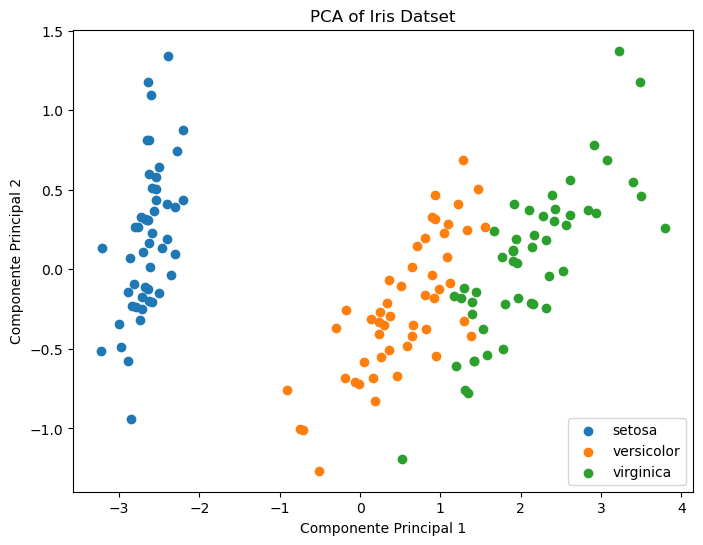

In [27]:
plt.figure(figsize=(8, 6))
for i in range(0, 3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=especies[i])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA of Iris Datset')
plt.legend();


# Singular Value Decomposition (SVD)

In [28]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [29]:
U, sigma, VT = np.linalg.svd(A)
U

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [31]:
sigma

array([9.52551809, 0.51430058])

In [32]:
VT

array([[-0.61962948, -0.78489445],
       [-0.78489445,  0.61962948]])

In [33]:
iris = load_iris()
X = iris.data

In [34]:
X_centrado = X - np.mean(X, axis=0)
X_centrado

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [35]:
U, sigma, VT = np.linalg.svd(X_centrado)

In [36]:
k = 2 
x_transformado = U[:, :k] * sigma[:k]

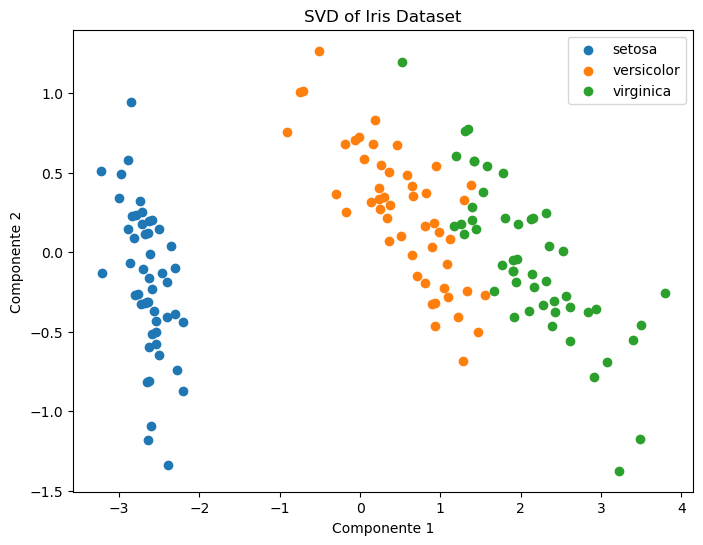

In [37]:
especies = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(x_transformado[y == i, 0], x_transformado[y == i, 1], label=especies[i])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('SVD of Iris Dataset')
plt.legend();

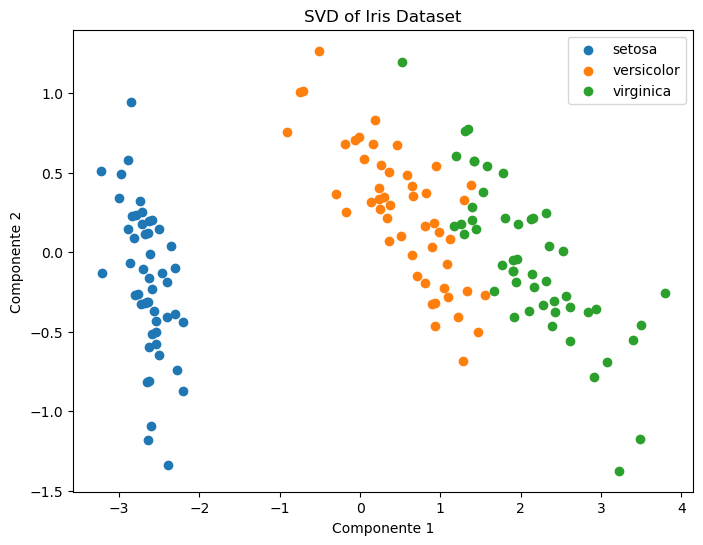

In [38]:
especies = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(x_transformado[iris.target == i, 0], x_transformado[iris.target == i, 1], label=especies[i])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('SVD of Iris Dataset')
plt.legend();

# Autoencoders

In [1]:
digitos = load_digits()
digitos

NameError: name 'load_digits' is not defined

In [ ]:
digitos['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digitos['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

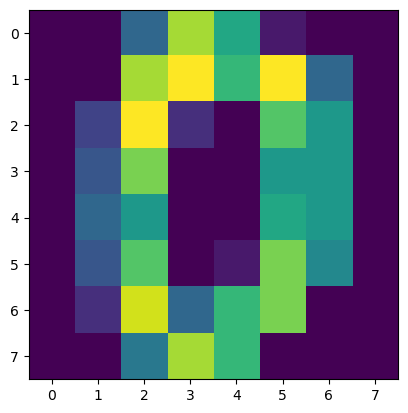

In [ ]:
plt.imshow(digitos['data'][0].reshape(8, 8));

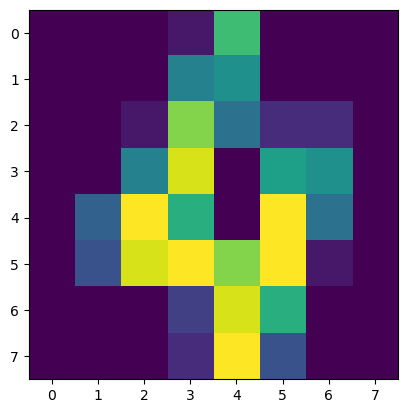

In [ ]:
plt.imshow(digitos['images'][4]);

In [ ]:
X = digitos.data

In [ ]:
X = X / 16.0

In [ ]:
X_entrena, X_prueba = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
imagen_entrada = Input(shape=(64,))

In [ ]:
codificado = Dense(32, activation='relu')(imagen_entrada)


I0000 00:00:1749688059.617522   16745 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1373 MB memory:  -> device: 0, name: NVIDIA GeForce GT 1030, pci bus id: 0000:01:00.0, compute capability: 6.1


In [ ]:
decodificado = Dense(64, activation='sigmoid')(codificado)

In [ ]:
autoencoder = Model(inputs=imagen_entrada, outputs=decodificado)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_entrena, X_entrena, epochs=50, batch_size=256, shuffle=True, validation_data=(X_prueba, X_prueba))

In [ ]:
for i in range(10):
  plt.subplot(2,10, i + 1)
  plt.imshow(X_prueba[i].reshape(8,8))
  plt.subplot(2,10, i + 11)
  plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8,8))
  plt.show()

## Clustering Jerarquico

In [3]:
iris = load_iris()

In [6]:
x = iris.data

In [5]:
linked = linkage(x, 'ward')

Text(0.5, 1.0, 'Dendrogram for Iris Dataset')

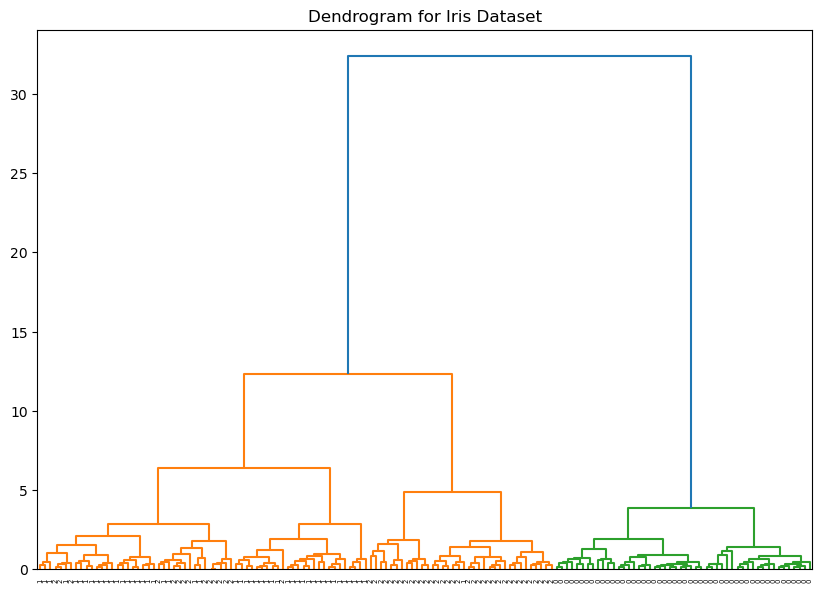

In [13]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.target, distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram for Iris Dataset')